In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split 
import math
from tensorflow.keras.utils import to_categorical
import os
import cv2

In [2]:
cat_path = "datasett-hundogkatt/training_set/training_set/cats/"
dog_path = "datasett-hundogkatt/training_set/training_set/dogs/"

In [3]:
cat_img = []
for i in os.listdir(cat_path):
    if i.endswith(".jpg"):
        temp_img = cv2.imread(os.path.join(cat_path, i), cv2.IMREAD_GRAYSCALE)
        temp_img = cv2.resize(temp_img, (64,64), interpolation= cv2.INTER_LINEAR )
        cat_img.append(temp_img)

In [4]:
cat_img = np.asarray(cat_img)
cat_img = np.expand_dims(cat_img,-1)

In [5]:
y_cat = np.zeros(cat_img.shape[0])

In [6]:
dog_img = []
for i in os.listdir(dog_path):
    if i.endswith(".jpg"):
        temp_img = cv2.imread(os.path.join(dog_path, i), cv2.IMREAD_GRAYSCALE)
        temp_img = cv2.resize(temp_img, (64,64), interpolation= cv2.INTER_LINEAR )
        dog_img.append(temp_img)

In [7]:
dog_img = np.asarray(dog_img)
dog_img = np.expand_dims(dog_img,-1)

In [8]:
y_dog = np.ones(dog_img.shape[0])

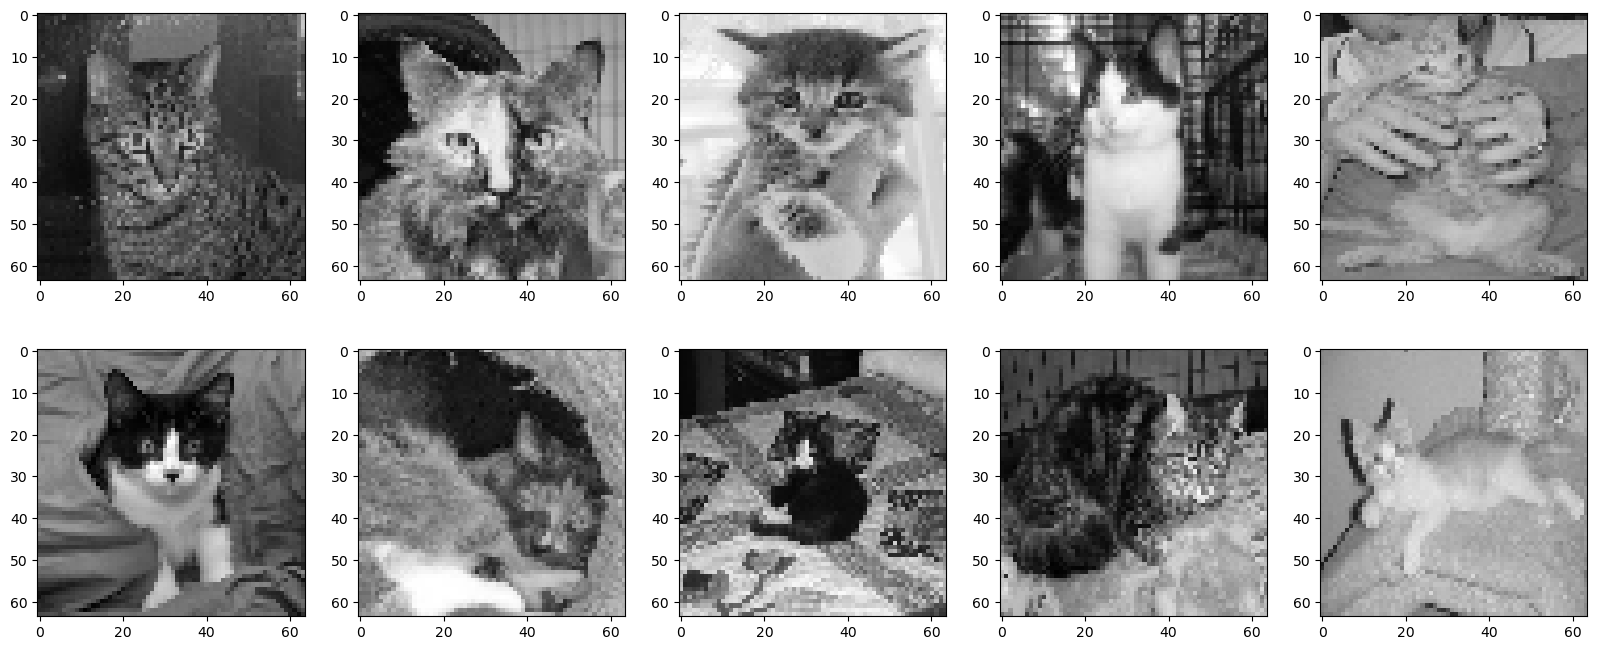

In [9]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(cat_img[i],cmap='gray', vmin=0, vmax=255)

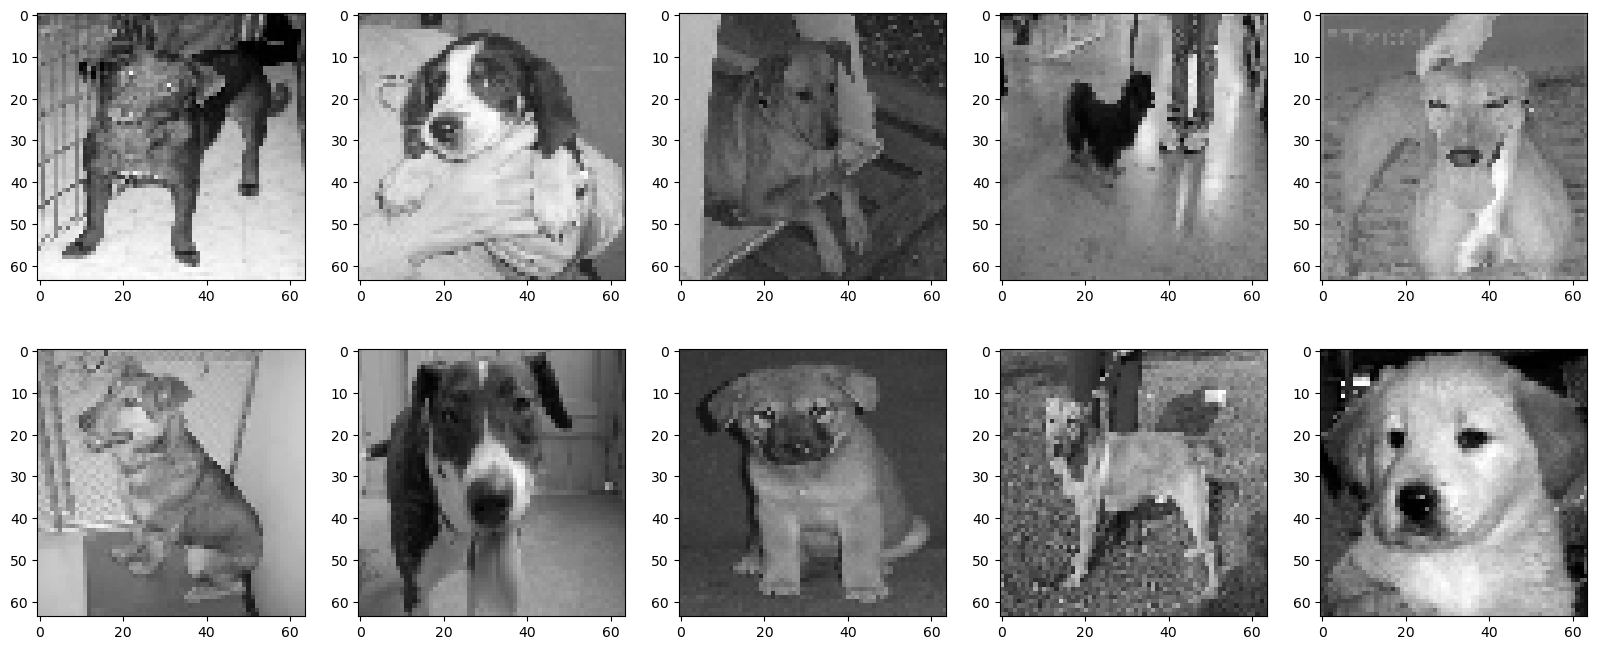

In [10]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(dog_img[i],cmap='gray', vmin=0, vmax=255)

In [11]:
X = np.vstack([cat_img,dog_img])

In [12]:
y = np.hstack([y_cat,y_dog])

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

In [14]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([3168, 3236], dtype=int64))

In [15]:
np.unique(y_val, return_counts=True)

(array([0., 1.]), array([832, 769], dtype=int64))

In [16]:
y_train = np.expand_dims(y_train ,-1)

In [17]:
X_train.shape

(6404, 64, 64, 1)

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(6, 5, activation='tanh', input_shape=(X_train.shape[1],X_train.shape[2],1)))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Conv2D(16, 5, activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Conv2D(120, 4, activation='tanh'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 30, 30, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 30, 30, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 13, 13, 16)       0         
 ePooling2D)                                                     
                                                                 
 activation_1 (Activation)   (None, 13, 13, 16)        0

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(6, 5, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1)))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(16, 5, activation='relu'))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(120, 5, activation='relu', name="last_conv"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 60, 60, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 30, 30, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_2 (Activation)   (None, 30, 30, 6)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 13, 13, 16)       0         
 ePooling2D)                                                     
                                                                 
 activation_3 (Activation)   (None, 13, 13, 16)       

In [20]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), 
                metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC(curve='ROC')])

In [21]:
history = model.fit(x=X_train,y=y_train, epochs=15, batch_size=64, validation_data=(X_val,y_val), shuffle=True)

Epoch 1/15
101/101 [==============================] - 14s 127ms/step - loss: 1.9212 - binary_accuracy: 0.5167 - auc: 0.5282 - val_loss: 1.4274 - val_binary_accuracy: 0.5397 - val_auc: 0.5654
Epoch 2/15
101/101 [==============================] - 13s 124ms/step - loss: 1.2780 - binary_accuracy: 0.5525 - auc: 0.5758 - val_loss: 1.4669 - val_binary_accuracy: 0.5447 - val_auc: 0.5838
Epoch 3/15
101/101 [==============================] - 12s 122ms/step - loss: 1.0903 - binary_accuracy: 0.5768 - auc: 0.6050 - val_loss: 1.0347 - val_binary_accuracy: 0.5771 - val_auc: 0.5989
Epoch 4/15
101/101 [==============================] - 12s 119ms/step - loss: 0.9495 - binary_accuracy: 0.5898 - auc: 0.6269 - val_loss: 0.9891 - val_binary_accuracy: 0.5621 - val_auc: 0.5978
Epoch 5/15
101/101 [==============================] - 12s 118ms/step - loss: 0.8969 - binary_accuracy: 0.6095 - auc: 0.6467 - val_loss: 1.0943 - val_binary_accuracy: 0.5765 - val_auc: 0.6094
Epoch 6/15
101/101 [=========================

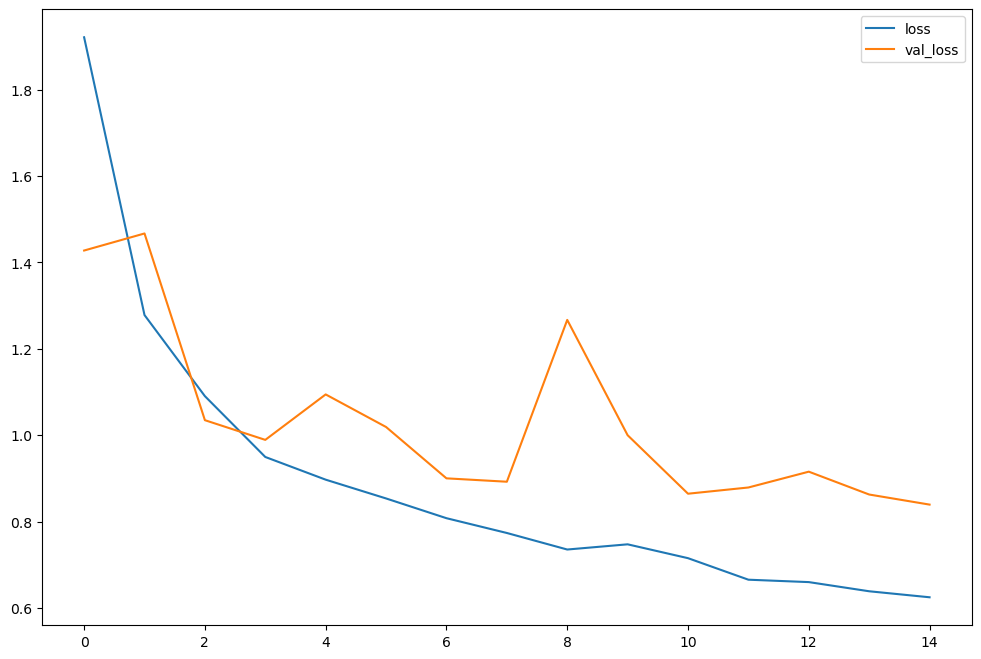

In [22]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

In [23]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'auc', 'val_loss', 'val_binary_accuracy', 'val_auc'])

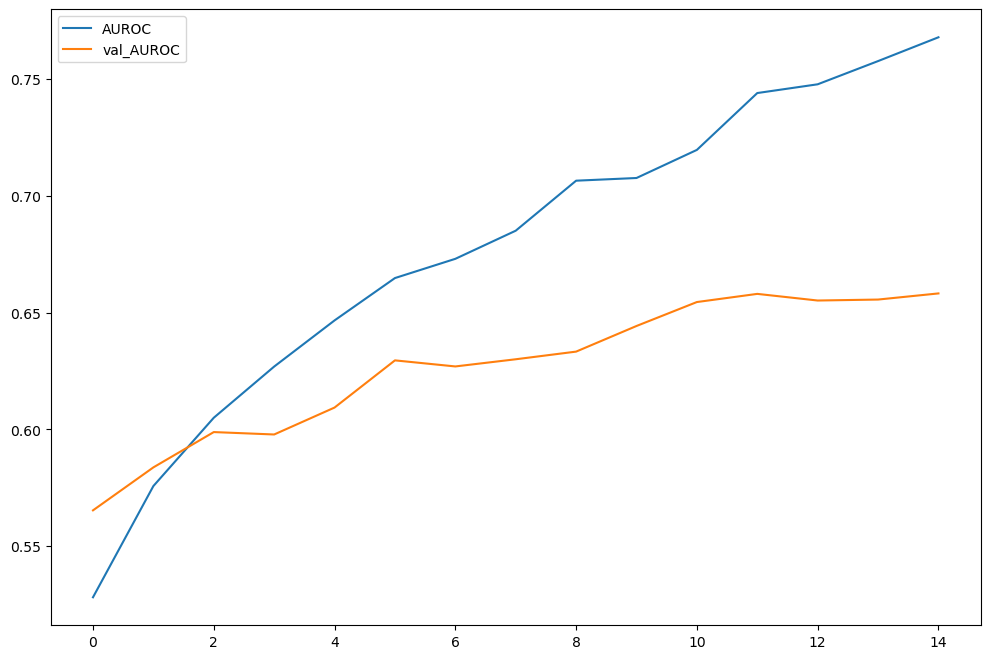

In [24]:
plt.figure(figsize=(12,8))
plt.plot(history.history[list(history.history.keys())[2]], label="AUROC")
plt.plot(history.history[list(history.history.keys())[5]], label="val_AUROC")
plt.legend()

In [35]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [45]:
from IPython.display import Image, display
import matplotlib as mpl
def save_and_display_gradcam(img, heatmap, cam_path="cam.jpg", alpha=0.5):
    # Load the original image


    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)
    
    #plt.imshow(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)
    plt.imshow(superimposed_img)
    # Save the superimposed image
    #superimposed_img.save(cam_path)

    # Display Grad CAM
    #display(Image(cam_path))



In [46]:
heat_map = make_gradcam_heatmap(X_val[2:3], model, "last_conv", pred_index=None)

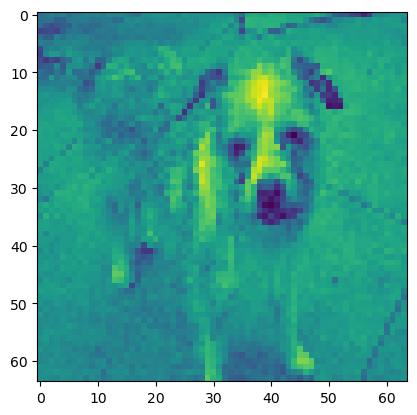

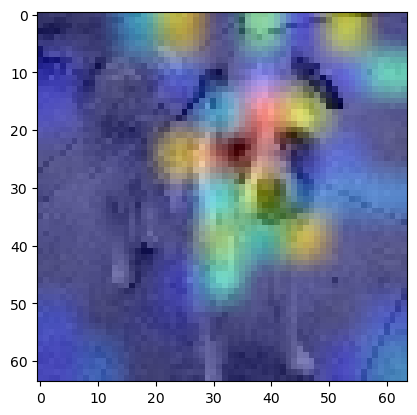

In [49]:
plt.imshow( tf.keras.utils.array_to_img(X_val[2]))
plt.show()
save_and_display_gradcam(X_val[2],heat_map)